In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def to_datetime(timestamp:str):
    return datetime.strptime(timestamp[:timestamp.find(".")], "%Y-%m-%dT%H:%M:%S")

In [3]:
jun_17_df = pd.read_csv("bustime_log_data/2020-06-17.csv")
jun_17_df["Timestamp"] = jun_17_df["Timestamp"].apply(to_datetime)
jun_17_df

,ID,Timestamp,Route,Next stop,Destination,Bearing,Longitude,Latitude
0,13,2020-06-17 11:03:53,M50,E 49 ST/LEXINGTON AV,WEST SIDE 42 ST PIER CROSSTOWN,157.152970,-73.972348,40.755663
1,14,2020-06-17 11:03:31,M42,12 AV/W 42 ST,WEST SIDE PIER 12 AV CROSSTOWN,215.148670,-74.000959,40.762583
2,15,2020-06-17 11:03:53,M42,W 42 ST/9 AV,WEST SIDE PIER 12 AV CROSSTOWN,156.819140,-73.992938,40.758546
3,4950,2020-06-17 11:03:42,M60-SBS,E 125 ST/2 AV,SELECT BUS WEST SIDE BROADWAY-106 ST,48.576336,-73.927515,40.788679
4,13,2020-06-17 11:03:53,M50,E 49 ST/LEXINGTON AV,WEST SIDE 42 ST PIER CROSSTOWN,157.152970,-73.972348,40.755663
...,...,...,...,...,...,...,...,...
3305,13,2020-06-17 20:05:12,M42,W 42 ST/11 AV,WEST SIDE PIER 12 AV CROSSTOWN,156.526470,-73.996058,40.759872
3306,13,2020-06-17 20:05:43,M42,W 42 ST/11 AV,WEST SIDE PIER 12 AV CROSSTOWN,157.649120,-73.997427,40.760445
3307,13,2020-06-17 20:05:43,M42,W 42 ST/11 AV,WEST SIDE PIER 12 AV CROSSTOWN,157.649120,-73.997427,40.760445
3308,13,2020-06-17 20:06:44,M42,12 AV/W 42 ST,WEST SIDE PIER 12 AV CROSSTOWN,157.203480,-74.001053,40.761961


In [4]:
jun_17_df["ID"].value_counts()

13      1314
14       718
11       570
4950     443
15       265
Name: ID, dtype: int64

In [40]:
def read_csv(filepath):
    df = pd.read_csv("bustime_log_data/2020-06-17.csv")
    df["Timestamp"] = jun_17_df["Timestamp"].apply(to_datetime)
    return df

def get_unique_ids(df):
    return df.ID.unique()

def get_observation_time_interval_counts(df, bus_id):
    time_intervals = df[df["ID"] == bus_id].Timestamp.diff().apply(lambda t: t.seconds)
    time_interval_counts = time_intervals[time_intervals > 0].value_counts()
    return time_interval_counts

def barplot(time_interval_counts, bus_id):    
    plt.figure(figsize=(20, 10))
    plt.title(f"Timestamp intervals Bus {bus_id}")
    plt.xlabel("Counts")
    plt.ylabel("Interval between timestamps (s)")
    sns.barplot(y=time_interval_counts.index, x=time_interval_counts.values, orient="h")

def barplots(df):
    plt.figure(figsize=(50, 400))
    unique_ids = get_unique_ids(df)
    total = len(unique_ids)
    for i in range(total):
        u_id = unique_ids[i]
        time_interval_counts = get_observation_time_interval_counts(df, u_id)
        barplot(time_interval_counts, u_id, i + 1, total)
        

In [41]:
get_unique_ids(jun_17_df)

array([  13,   14,   15, 4950,   11])

In [42]:
time_intervals = dict()
for bus_id in get_unique_ids(jun_17_df):
    time_intervals[bus_id] = get_observation_time_interval_counts(jun_17_df, bus_id)

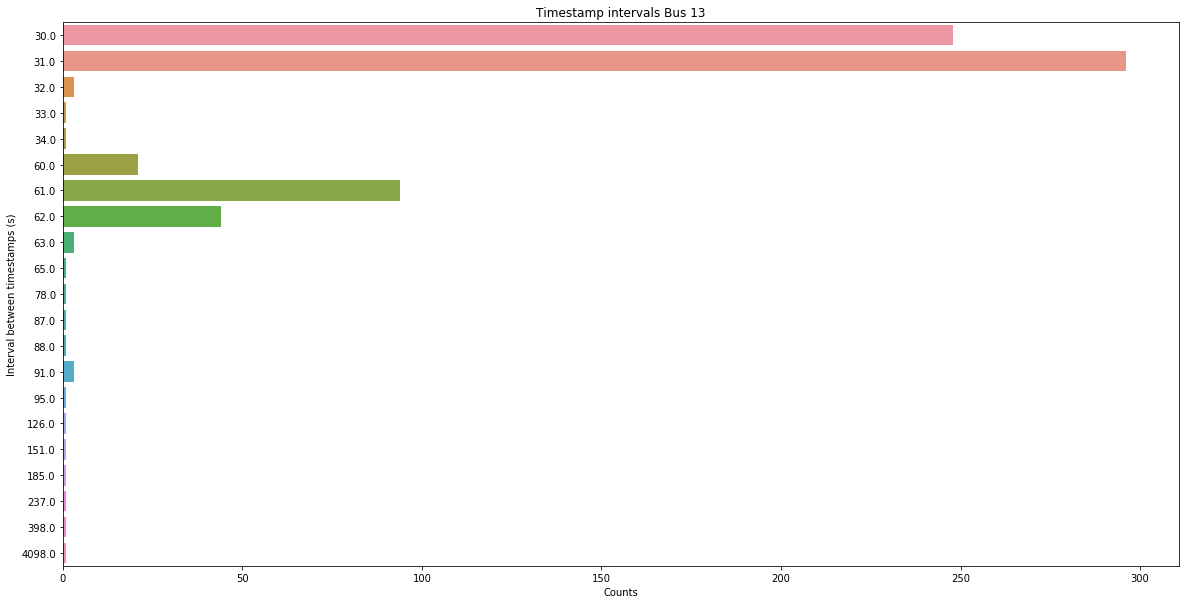

In [43]:
barplot(time_intervals[13], 13)

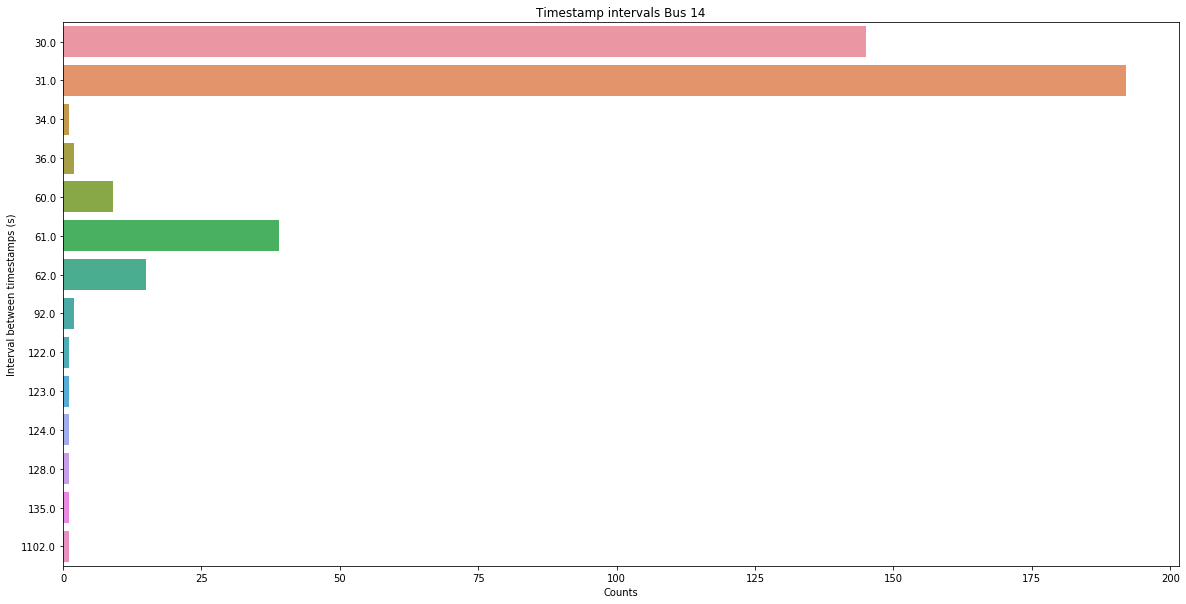

In [44]:
barplot(time_intervals[14], 14)

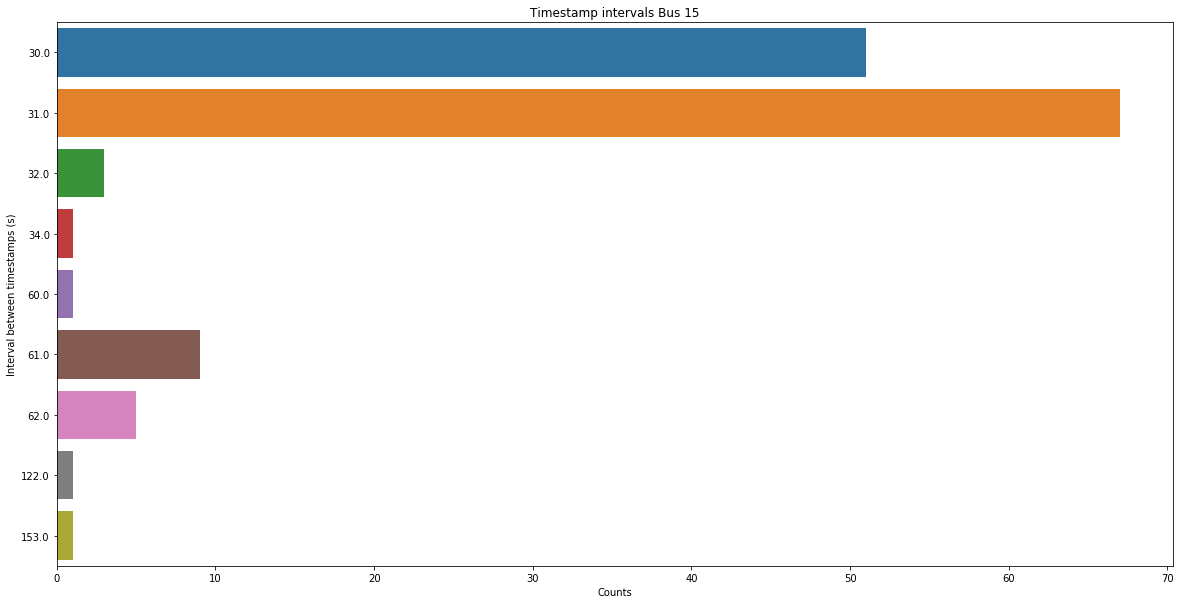

In [45]:
barplot(time_intervals[15], 15)

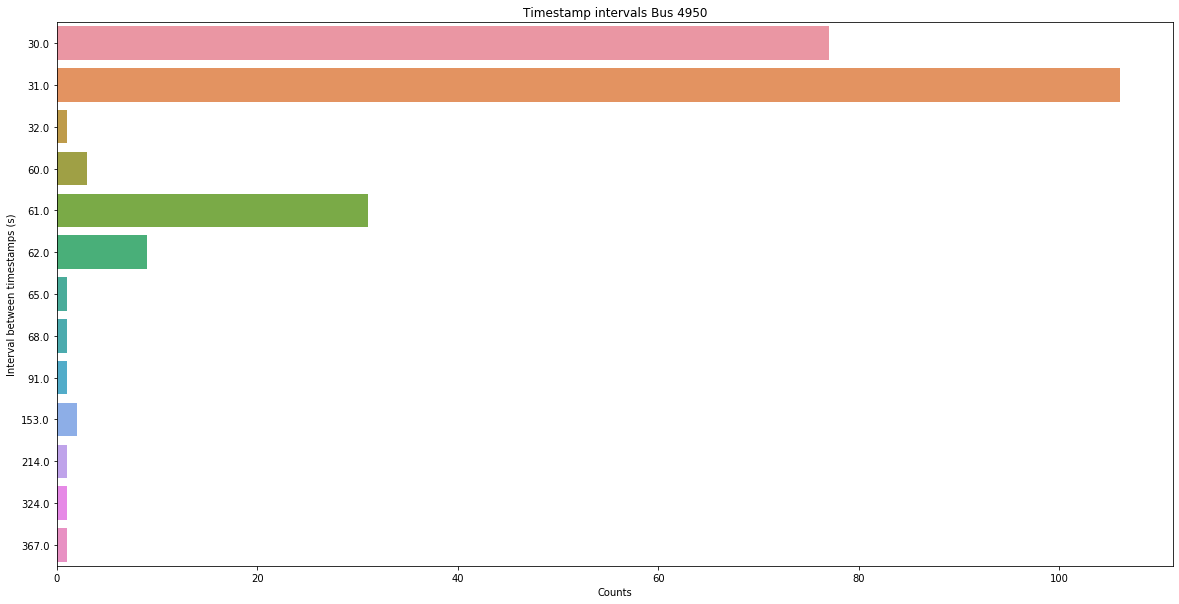

In [46]:
barplot(time_intervals[4950], 4950)

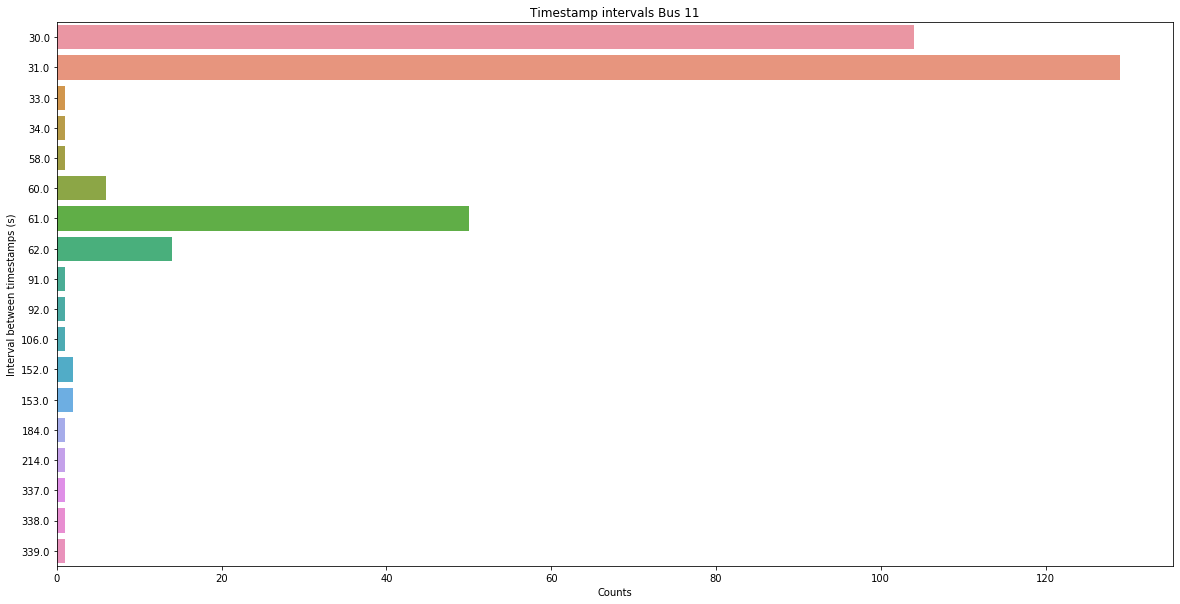

In [47]:
barplot(time_intervals[11], 11)